# Model Summary

IMPORTING PACKAGES

In [33]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [34]:
warnings.filterwarnings('ignore')
# Set random seed for reproducibility
np.random.seed(42)

LOAD THE DATASET

In [35]:
df = pd.read_csv(r'C:\Users\vanig\lokeshh\employee_salary.csv')

REMOVING NULL VALUES

In [36]:
df = df.dropna()

DATA CLEANING AND PRE-PROCESSING

In [39]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df = df.dropna(subset=['Salary'])

In [40]:
# Feature Engineering
df['Exp_to_Age'] = df['Years of Experience'] / df['Age']

In [41]:
# Define features and target
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Exp_to_Age']]
y = df['Salary']

In [42]:
#Define categorical and numerical columns
categorical_cols = ['Gender', 'Education Level', 'Job Title']
numerical_cols = ['Age', 'Years of Experience', 'Exp_to_Age']

In [43]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ])

In [44]:
# Create a pipeline with preprocessor and RandomForestRegressor
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

TRAIN THE MODEL

In [47]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
pipeline_rf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
# ✅ Save the trained model pipeline to a .pkl file
joblib.dump(pipeline_rf, 'employee_salary_prediction.pkl')
print("✅ Model saved as 'employee_salary_prediction.pkl'")

✅ Model saved as 'employee_salary_prediction.pkl'


PREDICTING

In [51]:
# Make predictions
y_pred_rf = pipeline_rf.predict(X_test)

In [52]:
# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

In [53]:
print("Random Forest Regressor Results:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared Score: {rf_r2:.2f}")

Random Forest Regressor Results:
Mean Squared Error: 237306800.00
R-squared Score: 0.90


In [54]:
# Cross-validation score
cv_scores = cross_val_score(pipeline_rf, X, y, cv=5, scoring='r2')
print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Average CV R-squared: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")


Cross-validation R-squared scores: [0.82029457 0.67929326 0.95034033 0.95335938 0.91570174]
Average CV R-squared: 0.86 (+/- 0.21)


In [55]:
# Try Linear Regression for comparison
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [56]:
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)


In [57]:
print("\nLinear Regression Results:")
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R-squared Score: {lr_r2:.2f}")


Linear Regression Results:
Mean Squared Error: 477401117.69
R-squared Score: 0.80


VISUALISING

STEP-1 : Actual vs Predicted Salaries (Random Forest)

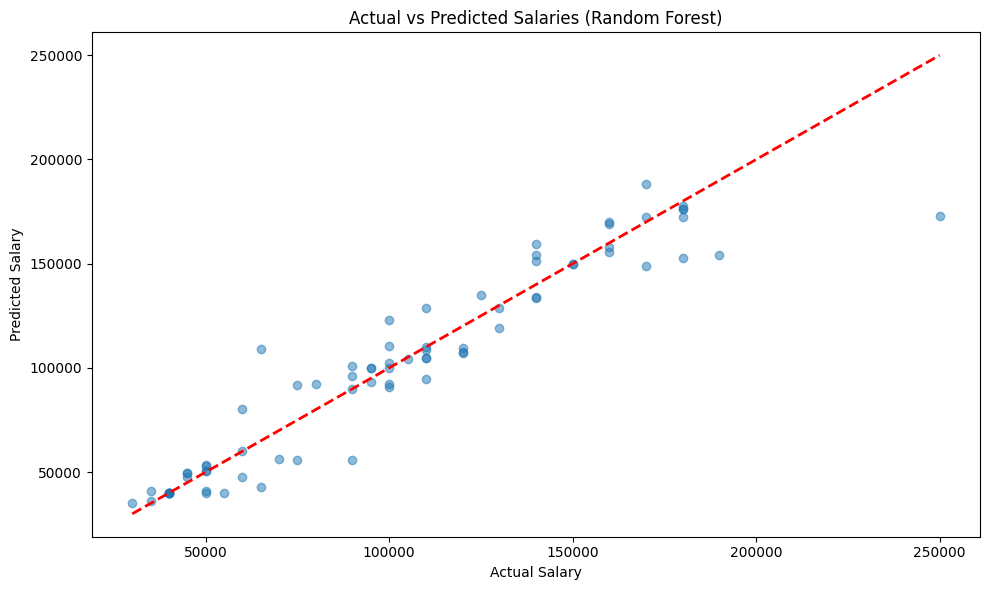

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries (Random Forest)')
plt.tight_layout()
plt.show()

STEP-2 : Feature Importance (Random Forest)

In [61]:

feature_names = (
    numerical_cols +
    list(pipeline_rf.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_cols))
)

In [62]:
importances = pipeline_rf.named_steps['regressor'].feature_importances_
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

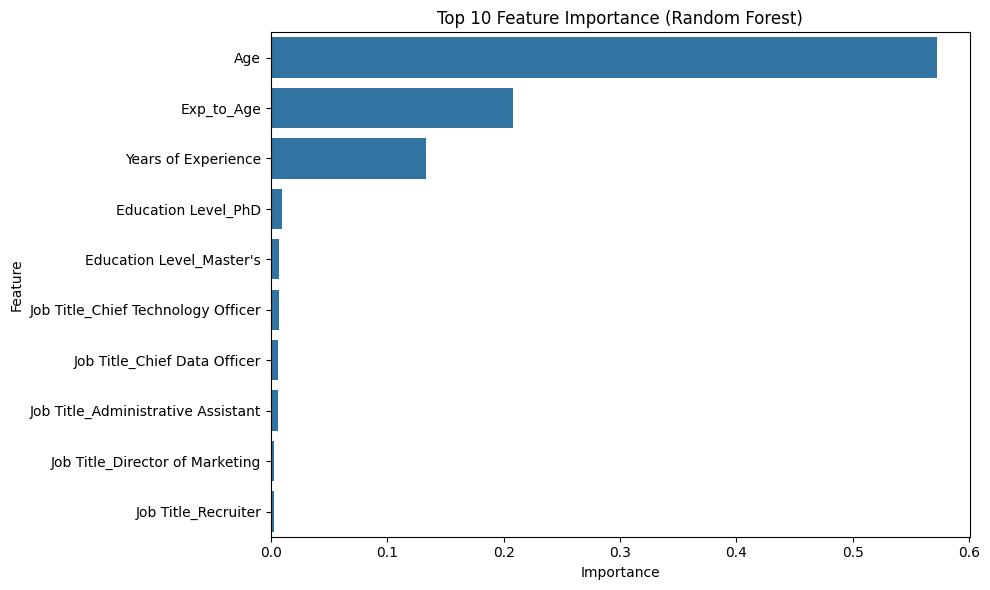

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

STEP-3 : Salary Distribution by Education Level

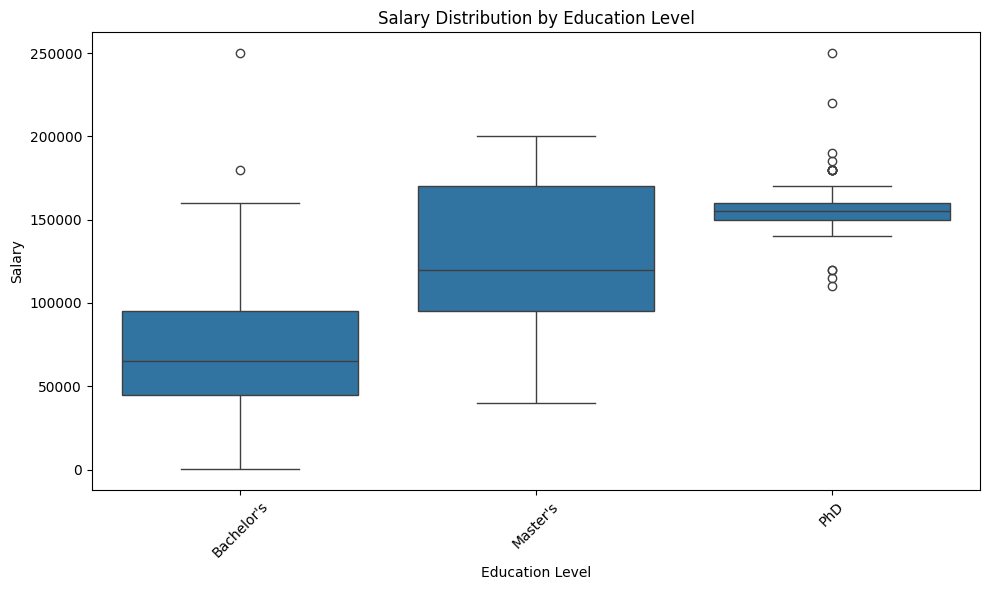

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary Distribution by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


STEP-4 : Salary vs Years of Experience

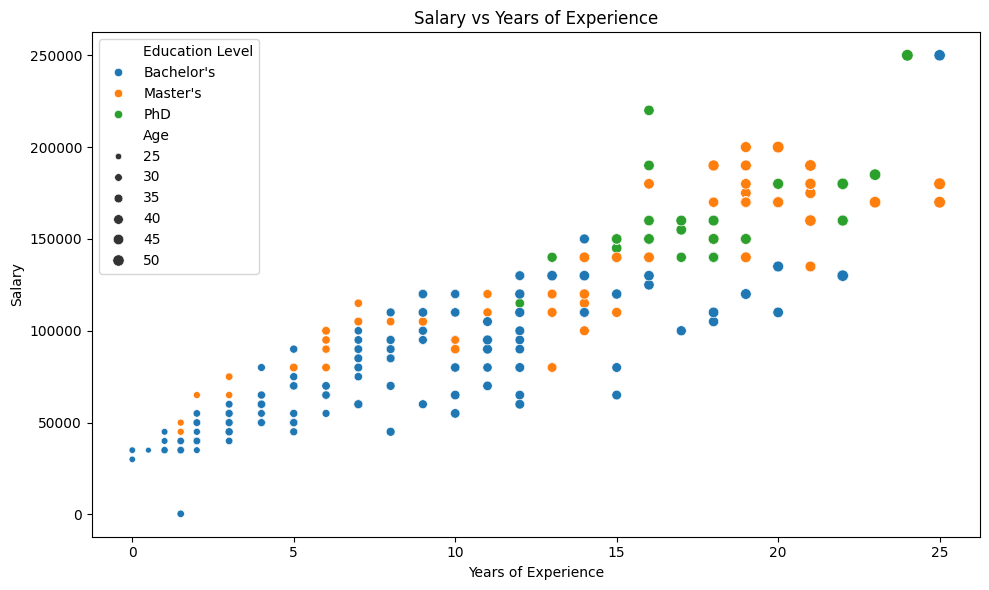

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Education Level', size='Age', data=df)
plt.title('Salary vs Years of Experience')
plt.tight_layout()
plt.show()